<a href="https://colab.research.google.com/github/Sourav-Alakkadan/ML-Tasks/blob/master/PlayerRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
df = pd.read_csv('/content/players_attribute.csv')
df

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
df.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
df.tail()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183973,183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0
183977,183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,...,88.0,53.0,38.0,32.0,30.0,9.0,9.0,78.0,7.0,15.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'player_fifa_api_id', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [ ]:
obj_col=['preferred_foot', 'attacking_work_rate','defensive_work_rate']

In [ ]:
df.drop(['Unnamed: 0','id','player_fifa_api_id','player_api_id','date'],axis=1,inplace=True)

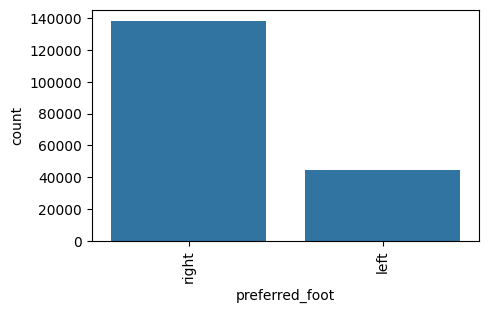

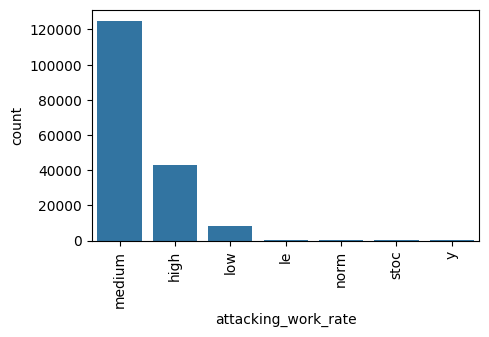

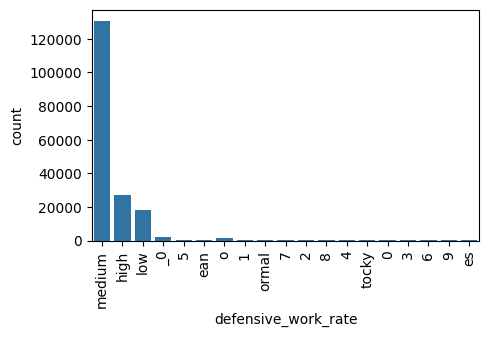

In [ ]:
for i in obj_col:
  plt.figure(figsize=(5,3))
  sns.countplot(x=i,data=df)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
df['attacking_work_rate'].unique()

array(['medium', 'high', nan, 'low', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [ ]:
df['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', nan, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

In [ ]:
df['attacking_work_rate'].replace({'le':'0','norm':'normal','stoc':'0','y':'0'},inplace=True)
df['defensive_work_rate'].replace({'_0':'0','o':'0','5':'0','ean':'0','1':'0','ormal':'normal','7':'0','2':'0','8':'0','4':'0','tocky':'0','3':'0','6':'0','9':'0','es':'0'},inplace=True)

In [ ]:
df.loc[df['attacking_work_rate']==0,'attacking_work_rate']=np.NaN
df.loc[df['defensive_work_rate']==0,'defensive_work_rate']=np.NaN

In [ ]:
df['defensive_work_rate']=df['defensive_work_rate'].fillna(df['defensive_work_rate'].mode()[0])
df['attacking_work_rate']=df['attacking_work_rate'].fillna(df['attacking_work_rate'].mode()[0])

In [ ]:
df['attacking_work_rate'].unique()

array(['medium', 'high', 'low', '0', 'normal'], dtype=object)

In [ ]:
df['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '0', 'normal'], dtype=object)

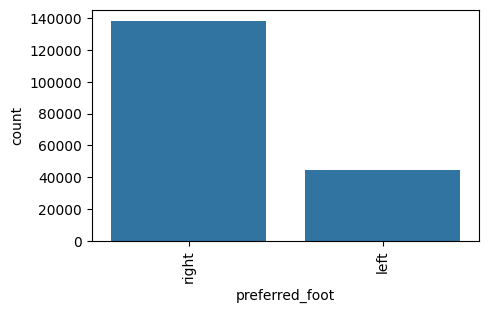

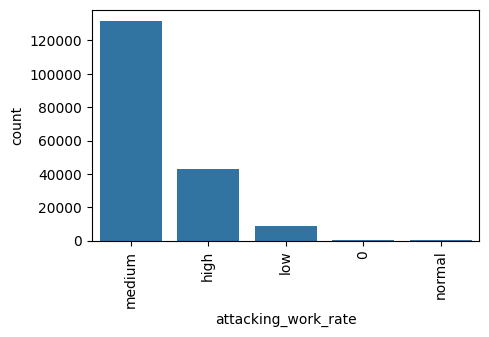

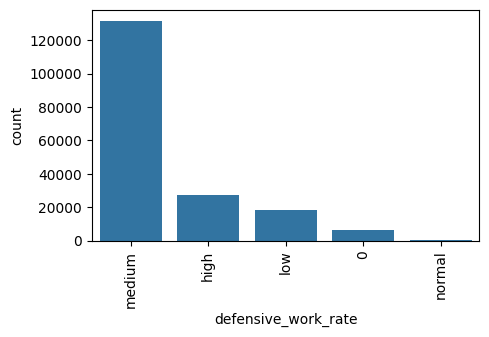

In [ ]:
for i in obj_col:
  plt.figure(figsize=(5,3))
  sns.countplot(x=i,data=df)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
df.dtypes

overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penalties              float64
marking                float64
standing_tackle        float64
sliding_

In [ ]:
lb=LabelEncoder()
df['preferred_foot']=lb.fit_transform(df['preferred_foot'])
df['attacking_work_rate']=lb.fit_transform(df['attacking_work_rate'])
df['defensive_work_rate']=lb.fit_transform(df['defensive_work_rate'])

In [ ]:
df.dtypes

overall_rating         float64
potential              float64
preferred_foot           int64
attacking_work_rate      int64
defensive_work_rate      int64
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penalties              float64
marking                float64
standing_tackle        float64
sliding_

<Axes: >

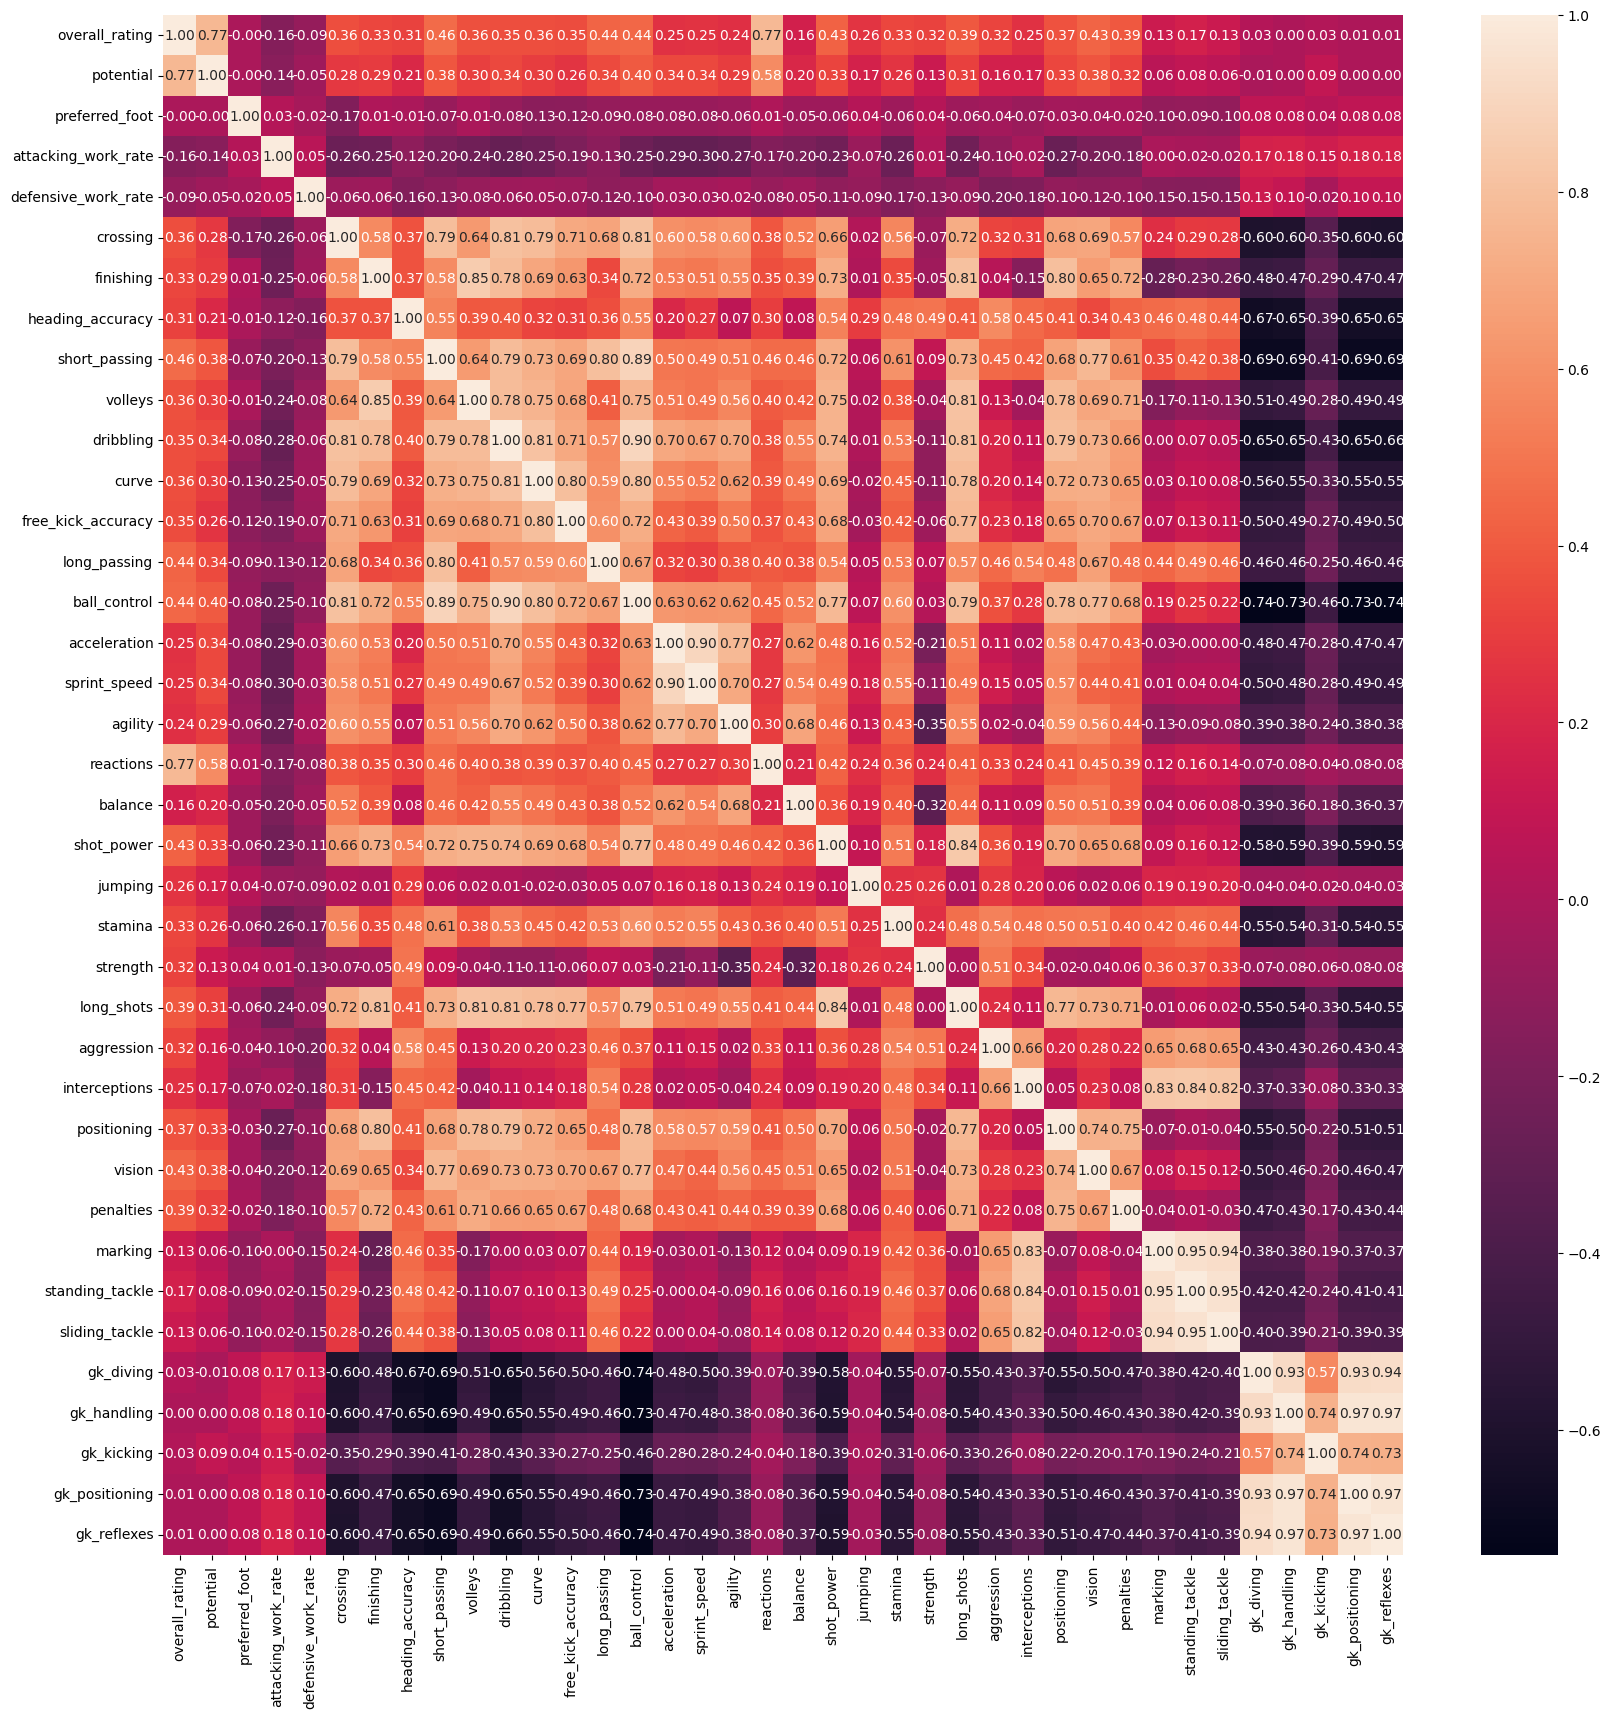

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [ ]:
df.drop(['preferred_foot','attacking_work_rate','defensive_work_rate','acceleration','sprint_speed','agility','jumping','interceptions','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes' ],axis=1,inplace=True)

In [ ]:
df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,reactions,balance,shot_power,stamina,strength,long_shots,aggression,positioning,vision,penalties
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,47.0,65.0,55.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,47.0,65.0,55.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,47.0,65.0,55.0,54.0,76.0,35.0,63.0,45.0,54.0,48.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,46.0,65.0,54.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,46.0,65.0,54.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,...,86.0,73.0,76.0,72.0,67.0,81.0,56.0,86.0,88.0,83.0
183974,78.0,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,...,74.0,73.0,75.0,66.0,65.0,73.0,61.0,72.0,88.0,70.0
183975,77.0,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,...,74.0,73.0,75.0,66.0,65.0,73.0,67.0,72.0,88.0,70.0
183976,78.0,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,...,69.0,73.0,72.0,67.0,59.0,78.0,63.0,68.0,88.0,53.0


In [ ]:
df.isna().sum()

overall_rating         836
potential              836
crossing               836
finishing              836
heading_accuracy       836
short_passing          836
volleys               2713
dribbling              836
curve                 2713
free_kick_accuracy     836
long_passing           836
ball_control           836
reactions              836
balance               2713
shot_power             836
stamina                836
strength               836
long_shots             836
aggression             836
positioning            836
vision                2713
penalties              836
dtype: int64

In [ ]:
main_col=['overall_rating','potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','reactions','balance','shot_power','stamina','strength','long_shots','aggression','positioning','vision','penalties']

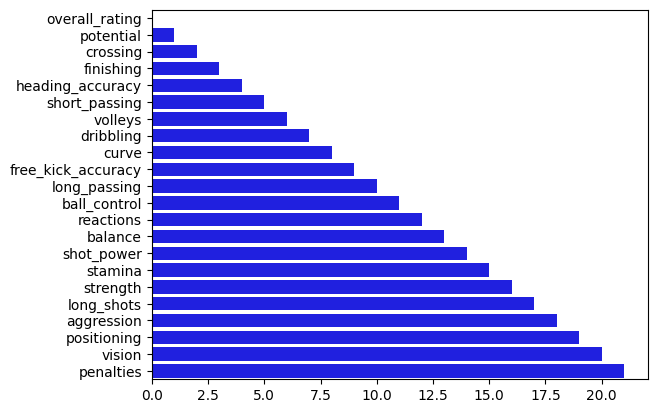

In [ ]:
sns.barplot(main_col,color='b')
plt.show()

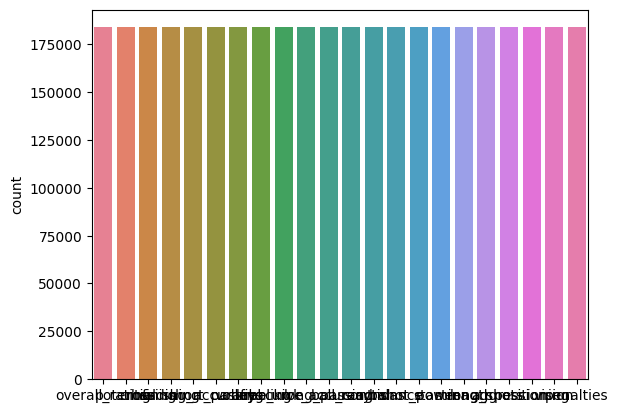

In [ ]:
sns.countplot(data=df[main_col])
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

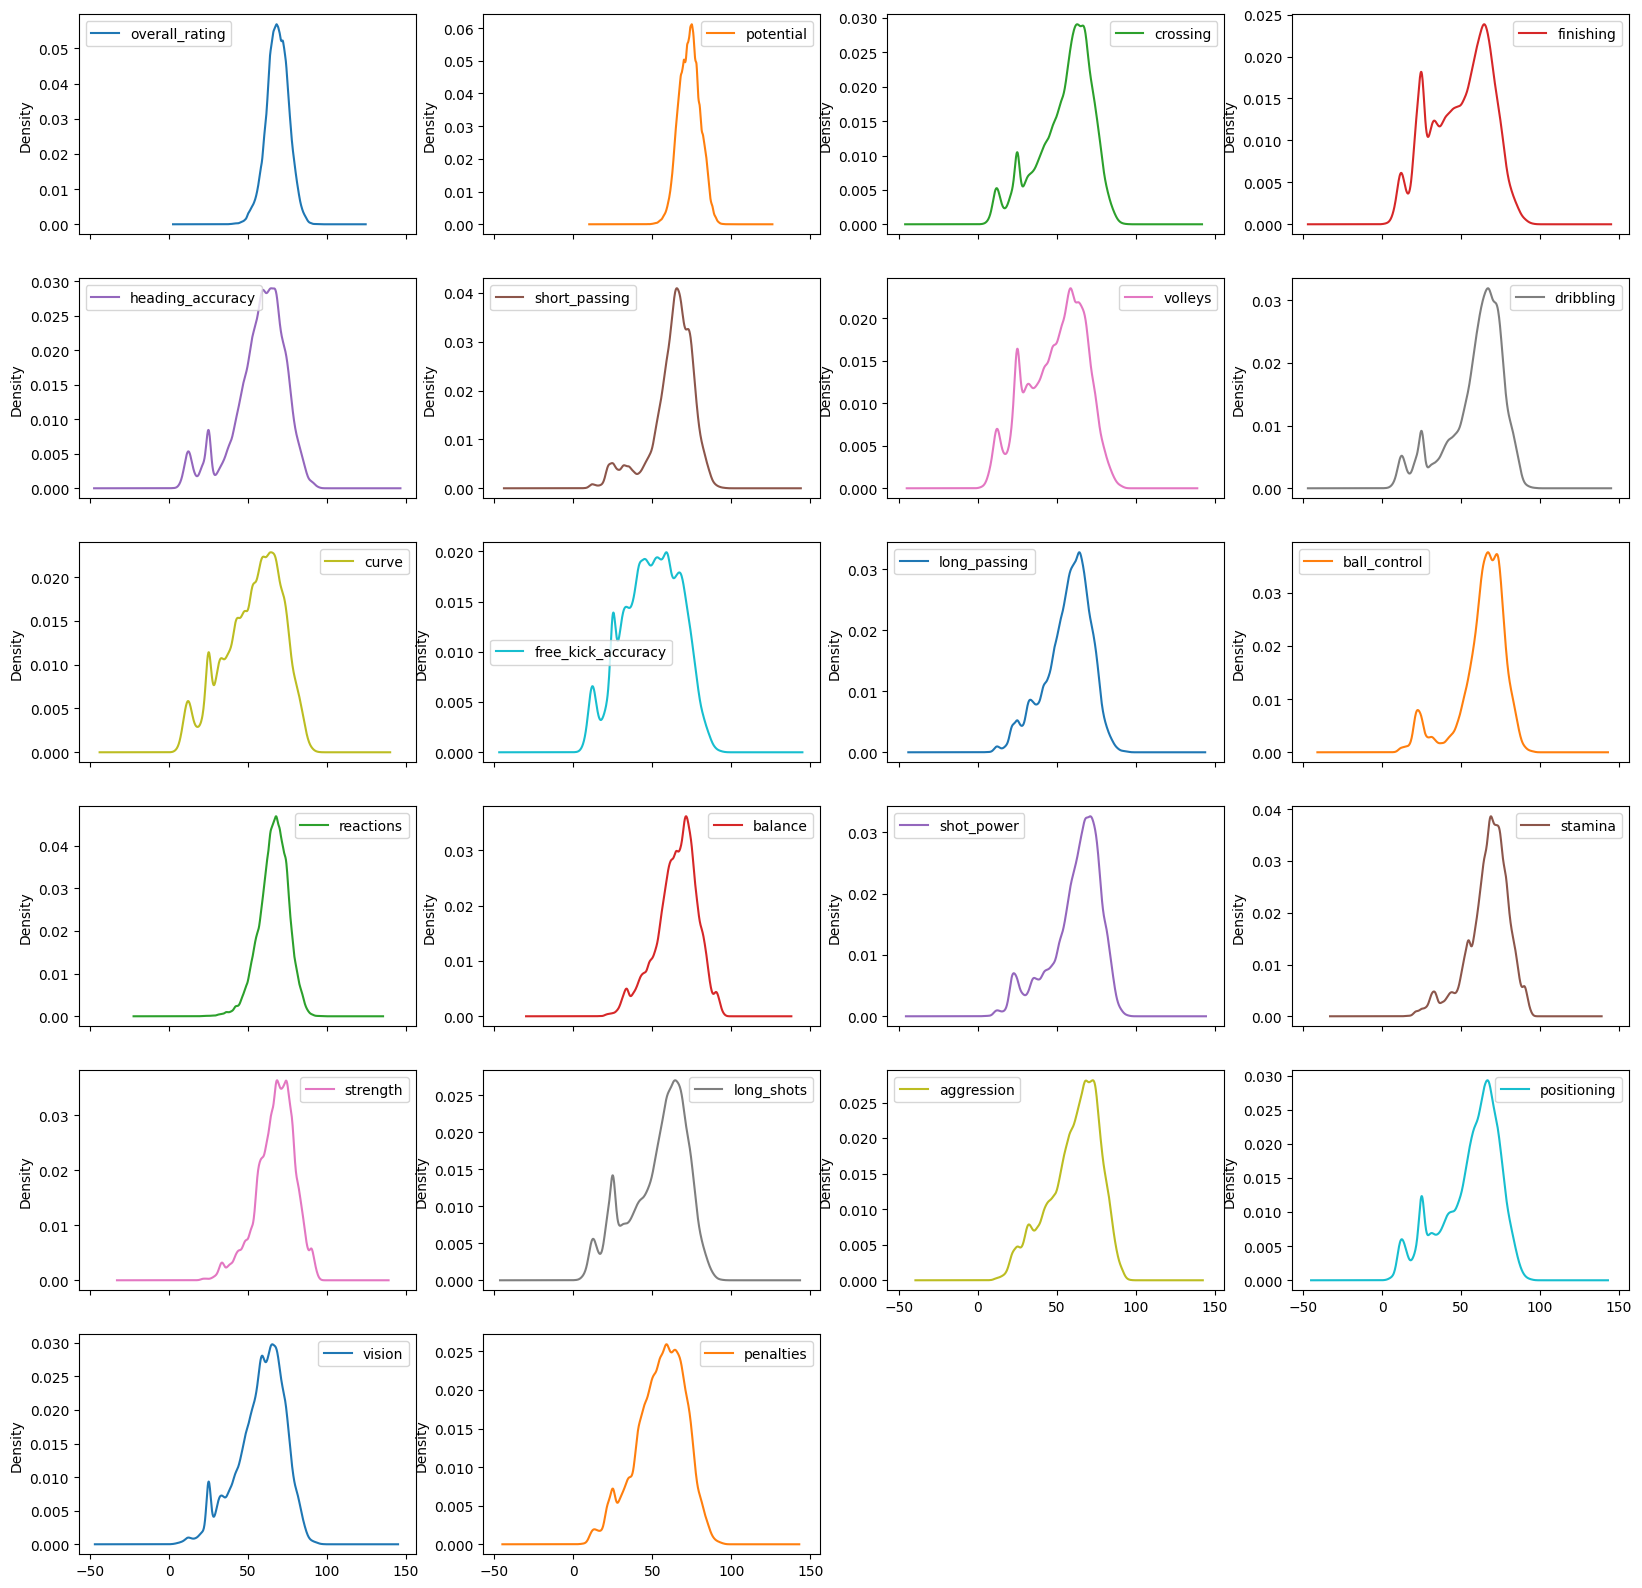

In [ ]:
df[main_col].plot(kind='kde',
                  subplots=True,
                  layout=(6,4),
                  figsize=(20,20))

In [ ]:
df['overall_rating']=df['overall_rating'].fillna(df['overall_rating'].mean())
df['potential']=df['potential'].fillna(df['potential'].mean())
df['crossing']=df['curve'].fillna(df['curve'].mean())
df['finishing']=df['finishing'].fillna(df['finishing'].mean())
df['heading_accuracy']=df['overall_rating'].fillna(df['heading_accuracy'].mean())
df['short_passing']=df['short_passing'].fillna(df['short_passing'].mean())
df['volleys']=df['volleys'].fillna(df['volleys'].mean())
df['dribbling']=df['dribbling'].fillna(df['dribbling'].mean())
df['curve']=df['curve'].fillna(df['curve'].mean())
df['free_kick_accuracy']=df['free_kick_accuracy'].fillna(df['free_kick_accuracy'].mean())
df['long_passing']=df['long_passing'].fillna(df['long_passing'].mean())
df['ball_control']=df['ball_control'].fillna(df['ball_control'].mean())
df['reactions']=df['reactions'].fillna(df['reactions'].mean())
df['balance']=df['balance'].fillna(df['balance'].mean())
df['shot_power']=df['shot_power'].fillna(df['shot_power'].mean())
df['stamina']=df['stamina'].fillna(df['stamina'].mean())
df['strength']=df['strength'].fillna(df['strength'].mean())
df['long_shots']=df['long_shots'].fillna(df['long_shots'].mean())
df['aggression']=df['aggression'].fillna(df['aggression'].mean())
df['positioning']=df['positioning'].fillna(df['positioning'].mean())
df['vision']=df['vision'].fillna(df['vision'].mean())
df['penalties']=df['penalties'].fillna(df['penalties'].mean())

In [ ]:
df.isna().sum()

overall_rating        0
potential             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
reactions             0
balance               0
shot_power            0
stamina               0
strength              0
long_shots            0
aggression            0
positioning           0
vision                0
penalties             0
dtype: int64

In [ ]:
x=df.iloc[:,1:].values
x

array([[71., 45., 44., ..., 45., 54., 48.],
       [71., 45., 44., ..., 45., 54., 48.],
       [66., 45., 44., ..., 45., 54., 48.],
       ...,
       [80., 86., 71., ..., 72., 88., 70.],
       [81., 86., 64., ..., 68., 88., 53.],
       [81., 86., 68., ..., 68., 88., 53.]])

In [ ]:
y=df.iloc[:,1].values
y

array([71., 71., 66., ..., 80., 81., 81.])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([81., 72., 70., ..., 72., 72., 80.])

In [ ]:
y_test

array([81., 72., 70., ..., 72., 72., 80.])

In [ ]:
print('Mean error is',mean_absolute_error(y_test,y_pred))
print('Percentage is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean squared error is',mean_squared_error(y_test,y_pred))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is',rmse)
print('Score is',r2_score(y_test,y_pred))

Mean error is 2.367431740936933e-13
Percentage is 3.242767595958451e-15
Mean squared error is 5.653486483297966e-26
RMSE is 2.3777061389704924e-13
Score is 1.0


In [ ]:
model.predict([x_test[100]])

array([72.])

In [ ]:
y_test[100]

72.0

In [ ]:
sns.boxplot(df[main_col])
plt.xticks(rotation=90)
plt.show()

In [ ]:
def iqr_method(df,overall_rating):
    q1=df[overall_rating].quantile(0.25)
    q3=df[overall_rating].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5 * iqr)
    upper=q3+(1.5 * iqr)
    return lower,upper

In [ ]:
for i in main_col:
  lower_lim,upper_lim=iqr_method(df,i)
  df[i]=np.where(df[i]>upper_lim,upper_lim,np.where(df[i]<lower_lim,lower_lim,df[i]))

In [ ]:
sns.boxplot(df[main_col])
plt.xticks(rotation=90)
plt.show()

In [ ]:
x = df.drop('overall_rating',axis=1).values
y = df['overall_rating'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

In [ ]:
print('Mean error is',mean_absolute_error(y_test,y_pred))
print('Percentage is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean squared error is',mean_squared_error(y_test,y_pred))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is',rmse)
print('Score is',r2_score(y_test,y_pred))